# Préparation et modélisation des données

In [13]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'image bird_small.png
img = plt.imread("bird_small.png")

dimensions de l'image bird_small.png :  (128, 128, 3)


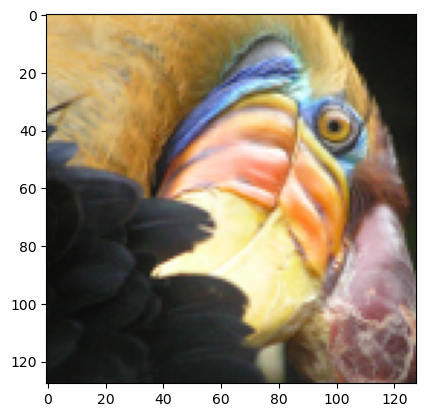

In [14]:
# Calcul et affichage des dimensions de l'image img
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'image bird_small.png
plt.figure()
plt.imshow(img)
plt.show()


Afin de pouvoir compresser l’image, il est nécessaire de redimensionner l’image tridimensionnelle en une matrice X bidimensionnelle. 

In [15]:
# Redimensionnement des données
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])


# Compression des images

Dans une image colorée, chaque pixel est représenté par trois entiers non signés de 8 bits (allant de 0 à 255) qui spécifient les valeurs d’intensité rouge, verte et bleue : c’est ce qu’on appelle le codage RGB. 


En pratique, nous ne pouvons visualiser que quelques couleurs dans une image. L’image ci-dessus est une image de 128 x128 pixels au format PNG. L’objectif est de la compresser davantage en utilisant la quantification des couleurs. 
Autrement dit, l’image contient des milliers de couleurs et l’objectif est de restreindre l’image à k couleurs. 


A cet égard, le clustering Mean Shift regroupe des couleurs similaires dans des groupe k.


Par conséquent, le centroïde de chaque groupe est représentatif des vecteurs de couleurs tridimensionnels (RGB). Ces centroïde k remplaceront tous les vecteurs de couleurs dans leurs groupes, gardant ainsi seulement k combinaisons de couleurs pour l’ensemble de l’image. 


Pour décompresse l’image, chaque pixel a pour vecteur de couleurs celui du centroïde le plus proche. 


Algorithme de Mean Shift

La première étape de l’application de tous les algorithmes de clustering, notamment le Mean Shift, consiste à représenter les données mathématiquement. 

L'algorithme Mean Shift consiste à regrouper les pixels adjacents qui présentent des caractéristiques spectrales similaires dans des segments.

La technique utilise une fenêtre, caractérisée par une bande passante en mouvement qui calcule une valeur moyenne de pixel pour déterminer quels pixels doivent être inclus dans chaque segment de l'image. 

Les caractéristiques des segments d’image dépendent de la bande passante de la fenêtre. En diminuant la bande passante, le nombre de segment augmente. Ainsi, plus a bande passante est petite, plus le nombre de clusters est important. 

Le package skleran.cluster implémente l’algorithme Mean Shift, la fonction MeanShift permet d’initialiser un classificateur permettant l’application de l’algorithme Mean Shift. Il s’utilise de façon très simple :


•	bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples) : initialisation d'une bande passante bandwidth en prenant en paramètres le jeu de données X, le quantile quantile et le nombre d'échantillons à utiliser n_samples. Le quantile est une valeur numérique qui divise le jeu de données X en intervalles contenant le même nombre de données.
•	cluster = MeanShift(bandwidth = bandwidth) : intialisation de l'objet cluster.
•	cluster.fit(X) : exécution de l'algorithme des Mean Shift sur le jeu de données X.


A l’issuer de son exécution, Mean Shift a associé chaque donnée à un groupe (les groupe sont nulmérotés de 0 a (k-1).


meanShift fournit une liste contenant les objets suivants :
-	labels_ : un vecteur qui contient le numéro du groupe de chacune des données.
-	cluster_centers_ : une liste des positions des K centroïdes.


In [16]:
# Définition de get_clusters_centroids(X, quantile, n_samples)
def get_clusters_centroids(X, quantile, n_samples) :
    
    # Bande passante
    bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples)
    
    # Initilisation de l'objet Cluster
    cluster = MeanShift(bandwidth = bandwidth)
    
    # Apprentissage des données
    cluster.fit(X)
    
    return cluster.cluster_centers_, cluster.labels_   

Le principe de la compression des images consiste à trouver le centroïde le plus proche à chaque pixel. Cela correspond aux labels que renvoit la fonction get_clusters_centroids. 


Nous allons ici implémenter nous même une fonction permettant de calculer les indices du centroïde le plus proche de chaque observation de X.

In [17]:
# Définition de la fonction findClosestCentroids

def findClosestCentroids(X, centroids) :
    
    idx = []                                     # Initialisation du vecteur des indices
    
    K = np.size(centroids, axis=0)               # Calcul du nombre de clusters
    
    for i in range(0, np.size(X, axis=0)) :      # Parcourir tous les pixels de l'image
        
        norm_val = []                            # Initialisation du vecteur des distances du pixel i aux centroïdes 
        
        for j in range(0, K) :                   # Parcourir tous les centroïdes
            
            a = ((X[i] - centroids[j])**2).sum() 
            norm_val.append(a)                   # Stockage de la distance du pixel i au centroïde j
            
        I = norm_val.index(min(norm_val))        # Récupérer les indices du centroïde le plus proche au pixel i
        
        idx.append(I)                            # Ajout de des indices à la liste idx 
        
    return idx



Pour pouvoir compresser l'image, il faut calculer les positions des centroïdes, regrouper les pixels et affecter chaque pixel au centroïde le plus proche.
Les deux fonctions ci-dessus répondent à ces besoins.

la dernière étape de compression consiste à remplacer les vecteurs de couleurs de chaque pixels par ceux des centroïdes les plus proches

In [18]:
# Calcul des labels et des positions des centroïdes 
centroids, labels = get_clusters_centroids(X, 0.1, 300)

# Calcul des indices du centroïde le plus proche à chaque élément de X
idx = findClosestCentroids(X, centroids)

# compression de l'image 
X_recovered = centroids[idx]

Pour pouvoir visualiser l'image construite, il faut redimensionner l'image compressée aux dimensions de l'image originale.

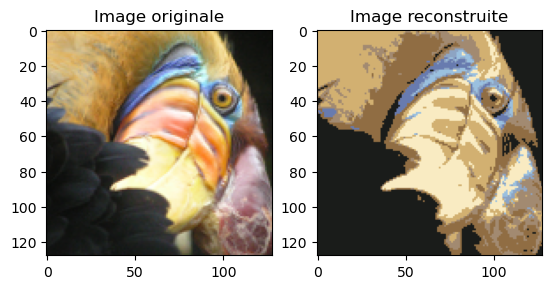

In [19]:
# Redimensionnement de la matrice X
X_recovered = X_recovered.reshape(img.shape[0], img.shape[1], img.shape[2])

# Affichage de l'image originale et celle reconstruite
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(122)
plt.imshow(X_recovered)
plt.title('Image reconstruite')
plt.show()

Ration de compression, évaluation de l’algorithme


Le taux de compression est une mesure de performance d’un algorithme de compression de données après compression de données informatiques. 

Il est défini comme le rapport de la taille des données après compression sur la taille initiale des données :


 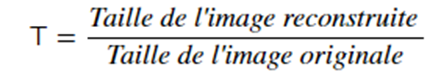


 
La cellule de code ci-dessous implémente un script pour calculer le taux de compression de l’image.


Amélioration de la qualité de compression


La compression d'image peut être effectuée avec perte de données ou sans perte.
La compression sans perte est souvent préférée là où la netteté des traits est primordiale.


Dans le cas de l'algorithme Mean Shift, il suffit de diminuer la valeur du quantile pour pouvoir conserver la netteté de l'image.


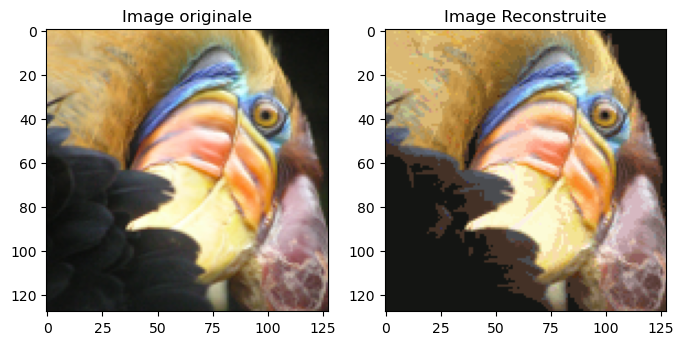

In [22]:
# Calcul des labels et des positions des centroïdes en utilisant quantile = 0.01
centroids2, labels2 = get_clusters_centroids(X, 0.01, 300)

# Calcul des indices du centroïde le plus proche à chaque élément de X
idx = findClosestCentroids(X, centroids2)

# compression de l'image 
X2_recovered = centroids2[idx]

# Redimensionnement de la matrice X
X2_recovered = X2_recovered.reshape(img.shape[0], img.shape[1], img.shape[2])

# Affichage de l'image originale et celle reconstruite
plt.figure(figsize = (8, 16))
plt.subplot(121)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(122)
plt.imshow(X2_recovered)
plt.title('Image Reconstruite')
plt.show()

L'algorithme Mean shift se base sur une approche simpliste. Il exploite intelligemment la densité des points afin de générer un nombre raisonnable de clusters.
La valeur de la bande passante est souvent choisie en fonction de certaines connaissances spécifiques du jeu de données. Par exemple, dans l'exemple de compression d'image ci-dessus, la valeur de la bande passante peut être considérée comme la distance qui sépare les pixels dans l'espace des couleurs RGB les uns aux autres.

Cet algorithme est de complexité quadratique. Pour les jeux de données massives, l'exécution peut donc prendre beaucoup de temps.